In [9]:
# import libraries
# following tutorial: https://towardsdatascience.com/building-an-image-color-analyzer-using-python-12de6b0acf74
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import cv2

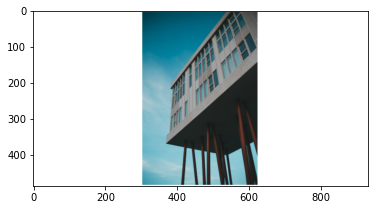

In [7]:
image = cv2.imread('test_image.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #converting the color format from BGR to RGB using cvtColor
plt.imshow(image)

In [10]:
# convert RGB into Hex color
# means we will have one output (hex) vs three diff values (R, G, B)

def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color


In [11]:
# preprocess image
# resize, reshape

def prep_image(raw_img):
    modified_img = cv2.resize(raw_img, (900, 600), interpolation = cv2.INTER_AREA)
    modified_img = modified_img.reshape(modified_img.shape[0]*modified_img.shape[1], 3)
    return modified_img

In [12]:
# use k-means to cluster top colors
# counter creates container to the elements as dict keys, volume is stored as dict value
# pass colors into rgb_to_hex
# visualize the result

def color_analysis(img, clusters):
    clf = KMeans(n_clusters = clusters) #may want to change depending on resolution desired
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    plt.figure(figsize = (12, 8))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    plt.savefig("color_analysis_report.png")
    print(hex_colors)
    print(counts)

['#3443f0', '#1e1e1e', '#a8a9a9', '#534e4e', '#f8f8f8', '#070707', '#7f817e', '#d0d0d0']
Counter({1: 103652, 7: 96254, 3: 94767, 0: 75490, 6: 62890, 2: 52381, 4: 46461, 5: 8105})


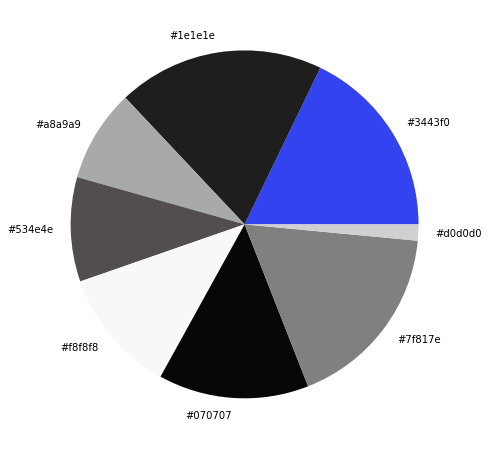

In [42]:
modified_image = prep_image(image)
color_analysis(modified_image, clusters = 8)

['#070707', '#d2d2d2', '#80827f', '#514d4d', '#3444f0', '#1e1e1e', '#abacac', '#f9f9f9']


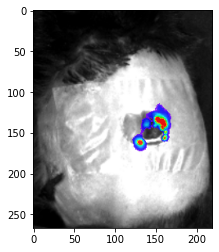

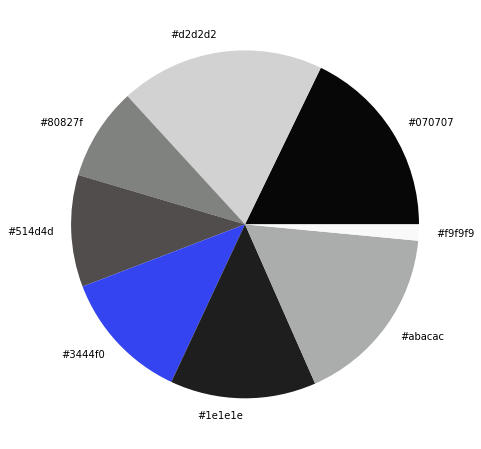

In [34]:
#Mouse G1
g1_feb14 = cv2.imread('Images/G1/2-14-g1-crop.png')
g1_feb14 = cv2.cvtColor(g1_feb14, cv2.COLOR_BGR2RGB) #converting the color format from BGR to RGB using cvtColor
plt.imshow(g1_feb14)

modified_image = prep_image(g1_feb14)
color_analysis(modified_image, clusters = 8)

['#9f9e9f', '#f8f8f8', '#ec2e14', '#19b0e7', '#c8c8c8', '#3e26f1', '#65ec31', '#4a494a']
Counter({2: 245506, 0: 96440, 4: 63286, 7: 53202, 3: 31460, 1: 26277, 5: 13819, 6: 10010})


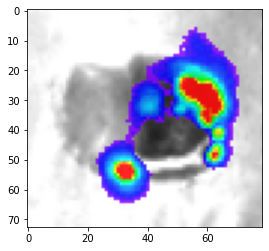

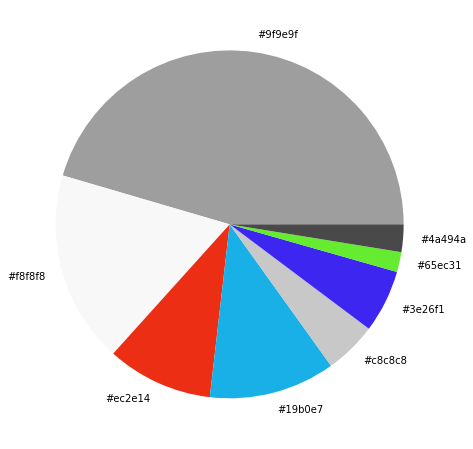

In [13]:
#Mouse G1 - zoomed in
g1_feb14 = cv2.imread('Images/G1/2-14-g1-crop-2.png')
g1_feb14 = cv2.cvtColor(g1_feb14, cv2.COLOR_BGR2RGB) #converting the color format from BGR to RGB using cvtColor
plt.imshow(g1_feb14)

modified_image = prep_image(g1_feb14)
color_analysis(modified_image, clusters = 8)

['#f8f8f8', '#3e26f1', '#ec2c14', '#9f9e9f', '#19b2e6', '#c8c8c8', '#68eb2f', '#4a494a']
Counter({0: 245506, 3: 96440, 2: 63816, 7: 53202, 1: 31460, 4: 25861, 5: 13643, 6: 10072})


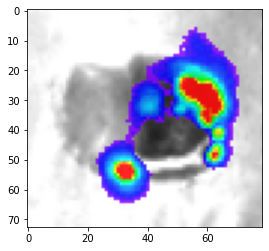

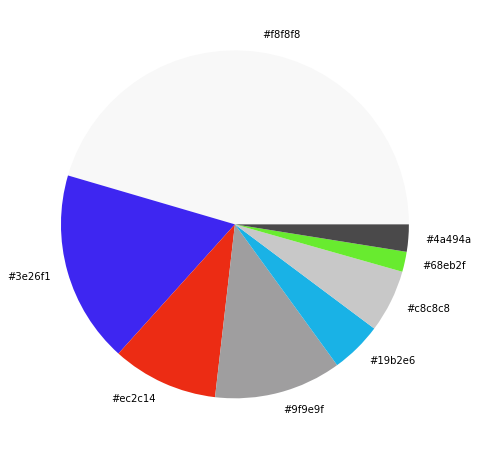

In [14]:
#Mouse G1 - zoomed in
g1_feb14 = cv2.imread('Images/G1/2-14-g1-crop-2.png')
g1_feb14 = cv2.cvtColor(g1_feb14, cv2.COLOR_BGR2RGB) #converting the color format from BGR to RGB using cvtColor
plt.imshow(g1_feb14)

modified_image = prep_image(g1_feb14)
color_analysis(modified_image, clusters = 8)

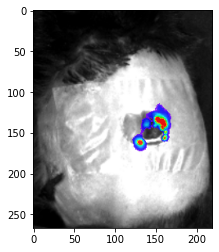

In [25]:
image = cv2.imread('../../DARPA/Animal Experiments/live imaging/AURA files/G and H - higher min - deleted ROI/G1/2-14-g1-crop.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #converting the color format from BGR to RGB using cvtColor
plt.imshow(image)

In [ ]:
img = cv2.imread('Images/G1/2-14-g1-crop-2.png')


# convert image to hsv colorspace
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

# threshold saturation image
thresh1 = cv2.threshold(s, 200, 255, cv2.THRESH_BINARY)[1]

# threshold value image and invert
thresh2 = cv2.threshold(v, 128, 255, cv2.THRESH_BINARY)[1]
thresh2 = 255 - thresh2

# combine the two threshold images as a mask
mask = cv2.add(thresh1,thresh2)

# use mask to remove lines in background of input
result = img.copy()
result[mask==0] = (255,255,255)

# display IN and OUT images
cv2.imshow('IMAGE', img)
cv2.imshow('SAT', s)
cv2.imshow('VAL', v)
cv2.imshow('THRESH1', thresh1)
cv2.imshow('THRESH2', thresh2)
cv2.imshow('MASK', mask)
cv2.imshow('RESULT', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# save output image
cv2.imwrite('symbols_thresh1.png', thresh1)
cv2.imwrite('symbols_thresh2.png', thresh2)
cv2.imwrite('symbols_mask.png', mask)
cv2.imwrite('symbols_cleaned.png', result)


In [22]:
#gives image a transparent background
#not using bc wasn't playing nicely with k-means

from PIL import Image
  
def convertImage():
    img = Image.open("Images/H3/H3_222_ROI.png")
    img = img.convert("RGBA")
  
    datas = img.getdata()
  
    newData = []
  
    for item in datas:
        if item[0] == 255 and item[1] == 255 and item[2] == 255:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
  
    img.putdata(newData)
    img.save("Images/H3/H3_222_transparent.png", "PNG")
    print("Successful")
  
convertImage()

Successful


['#fefefe', '#809bff', '#27fe0d', '#0042ff', '#00edf1', '#008bfe', '#00fe88', '#c5dc00']
Counter({0: 397361, 2: 68489, 1: 35384, 4: 20299, 3: 7891, 5: 4942, 6: 3070, 7: 2564})


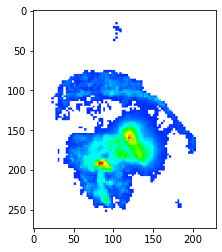

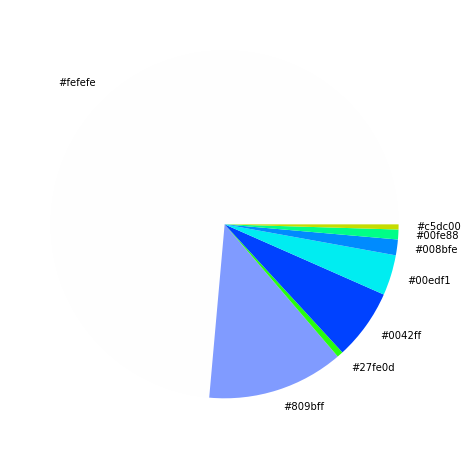

In [20]:
#Mouse H5 - fluorescence only
h5_222 = cv2.imread('Images/H5/H5_ROI.png')
h5_222 = cv2.cvtColor(h5_222, cv2.COLOR_BGR2RGB) #converting the color format from BGR to RGB using cvtColor
plt.imshow(h5_222)

modified_image = prep_image(h5_222)
color_analysis(modified_image, clusters = 8)

['#fefefe', '#9126ff', '#2662ff', '#26a2fe', '#5426ff', '#302bff', '#c699ff', '#25e9fa']
Counter({0: 435359, 1: 29679, 3: 26259, 6: 15457, 2: 12116, 4: 11536, 7: 8014, 5: 1580})


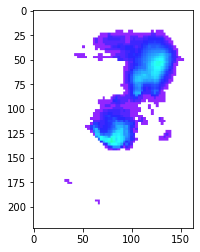

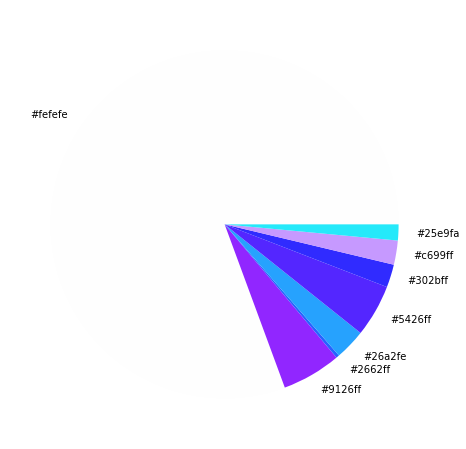

In [21]:
#Mouse H3 - fluorescence only
h3_222 = cv2.imread('Images/H3/H3_222_ROI.png')
h3_222 = cv2.cvtColor(h3_222, cv2.COLOR_BGR2RGB) #converting the color format from BGR to RGB using cvtColor
plt.imshow(h3_222)

modified_image = prep_image(h3_222)
color_analysis(modified_image, clusters = 8)

['#fefefe', '#5426ff', '#26a2fe', '#9126ff', '#2661ff', '#302bff', '#c699ff', '#25e9fa']
Counter({0: 435359, 3: 29679, 5: 26249, 1: 15457, 2: 12116, 4: 11546, 7: 8014, 6: 1580})


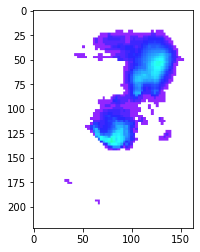

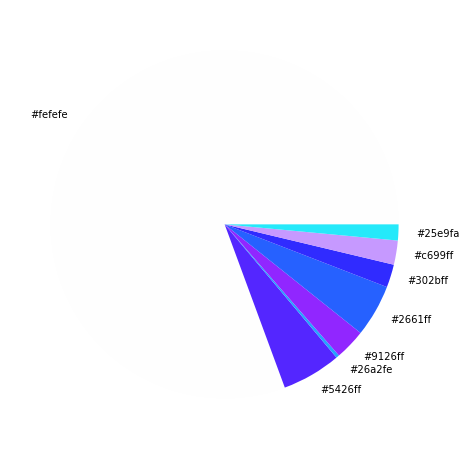

In [23]:
#Mouse H3 - fluorescence only
h3_222 = cv2.imread('Images/H3/H3_222_transparent.png')
h3_222 = cv2.cvtColor(h3_222, cv2.COLOR_BGR2RGB) #converting the color format from BGR to RGB using cvtColor
plt.imshow(h3_222)

modified_image = prep_image(h3_222)
color_analysis(modified_image, clusters = 8)



In [57]:
# use k-means to cluster top colors
# counter creates container to the elements as dict keys, volume is stored as dict value
# pass colors into rgb_to_hex
# visualize the result

def color_analysis_popbackground(img, clusters):
    clf = KMeans(n_clusters = clusters) #may want to change depending on resolution desired
    color_labels = clf.fit_predict(img) #a series of numbers ranging from 0 to clusters-1, 
                                        #where the number corresponds to a pixel and which color bin it fits into

    center_colors = clf.cluster_centers_ #gives RGB coordinates of the cluster centers
    counts = Counter(color_labels)
    
    ordered_colors = [center_colors[i] for i in counts.keys()] #orders the colors based on highest count
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()] #converts to hex
    
    idx = hex_colors.index('#fefefe') #background color
    hex_colors_popped = hex_colors.pop(idx)
    #remove dict element with idx as key
    counts.pop(idx)

    
    
    plt.figure(figsize = (12, 8))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    plt.savefig("color_analysis_report.png")
    
    print(hex_colors)
    print(counts)
    

['#267efe', '#9228ff', '#26d9fb', '#3b2bff']
Counter({1: 44309, 3: 30727, 4: 16357, 2: 12314})


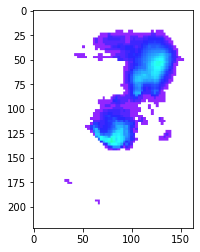

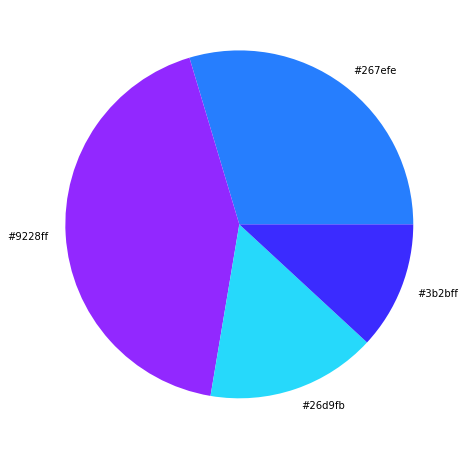

In [58]:
h3_222 = cv2.imread('Images/H3/H3_222_transparent.png')
h3_222 = cv2.cvtColor(h3_222, cv2.COLOR_BGR2RGB) #converting the color format from BGR to RGB using cvtColor
plt.imshow(h3_222)

modified_image = prep_image(h3_222)
color_analysis_popbackground(modified_image, clusters = 5)
